In [1]:
!pip3 install pickle5
import pandas as pd
import seaborn as sns
import pickle5 as pickle
import matplotlib.pyplot as plt

In [2]:
reward_dict = pickle.load(open( "/Users/alexanderkell/Documents/PhD/Projects/18-battery-optimisation/data/results/testing/rewards.pickle", "rb" ))
reward_dict

{'battery_size': ['0.8',
  '1.4',
  '1',
  '0.4',
  '0.2',
  '1.8',
  '0.6',
  '1.2',
  '2.0',
  '1.6'],
 'reward': [b'\x1b\x1b(pid=70800)\x1b calframe: [FrameInfo(frame=<frame at 0x7ff958adc220, file \'/Users/alexanderkell/Documents/PhD/Projects/18-battery-optimisation/src/models/run_model.py\', line 20, code __init__>, filename=\'/Users/alexanderkell/Documents/PhD/Projects/18-battery-optimisation/src/models/run_model.py\', lineno=19, function=\'__init__\', code_context=[\'        curframe = inspect.currentframe()\\n\', \'        calframe = inspect.getouterframes(curframe, 2)\\n\'], index=1), FrameInfo(frame=<frame at 0x7ff9686e3050, file \'src/models/rollout.py\', line 56, code <lambda>>, filename=\'src/models/rollout.py\', lineno=56, function=\'<lambda>\', code_context=[\'ModelCatalog.register_custom_model("BatteryEnv", BatteryEnv)\\n\', \'register_env("BatteryEnv", lambda _: BatteryEnv(_))\\n\'], index=1), FrameInfo(frame=<frame at 0x7ff98e4f3a20, file \'/Users/alexanderkell/anacon

In [3]:
reward_dict['reward'] = [float(elem.decode("utf-8").split("reward: ")[1].split("\n")[0]) for elem in reward_dict['reward']]
reward_dict

{'battery_size': ['0.8',
  '1.4',
  '1',
  '0.4',
  '0.2',
  '1.8',
  '0.6',
  '1.2',
  '2.0',
  '1.6'],
 'reward': [-31.41352053679144,
  -6.544653594456396,
  -23.976806473690583,
  -101.057132310645,
  -132.20091157380946,
  -1.0816016361674716,
  -47.08626046334802,
  -8.360091435073494,
  -0.7413939682817459,
  -2.4740334553426258],
 'directory': ['/Users/alexanderkell/Documents/PhD/Projects/18-battery-optimisation/data/models/new/DDPG_BatteryEnv_2ffd1_00003_3_battery_size=0.8_2021-04-04_20-23-08/checkpoint_30/checkpoint-30',
  '/Users/alexanderkell/Documents/PhD/Projects/18-battery-optimisation/data/models/new/DDPG_BatteryEnv_2ffd1_00006_6_battery_size=1.4_2021-04-04_20-23-08/checkpoint_30/checkpoint-30',
  '/Users/alexanderkell/Documents/PhD/Projects/18-battery-optimisation/data/models/new/DDPG_BatteryEnv_2ffd1_00004_4_battery_size=1_2021-04-04_20-23-08/checkpoint_30/checkpoint-30',
  '/Users/alexanderkell/Documents/PhD/Projects/18-battery-optimisation/data/models/new/DDPG_Batte

In [4]:
rewards = pd.DataFrame.from_dict(reward_dict)
rewards

,battery_size,reward,directory
0,0.8,-31.413521,/Users/alexanderkell/Documents/PhD/Projects/18...
1,1.4,-6.544654,/Users/alexanderkell/Documents/PhD/Projects/18...
2,1,-23.976806,/Users/alexanderkell/Documents/PhD/Projects/18...
3,0.4,-101.057132,/Users/alexanderkell/Documents/PhD/Projects/18...
4,0.2,-132.200912,/Users/alexanderkell/Documents/PhD/Projects/18...
5,1.8,-1.081602,/Users/alexanderkell/Documents/PhD/Projects/18...
6,0.6,-47.086260,/Users/alexanderkell/Documents/PhD/Projects/18...
7,1.2,-8.360091,/Users/alexanderkell/Documents/PhD/Projects/18...
8,2.0,-0.741394,/Users/alexanderkell/Documents/PhD/Projects/18...
9,1.6,-2.474033,/Users/alexanderkell/Documents/PhD/Projects/18...


In [5]:
rewards['battery_size'] = pd.to_numeric(rewards['battery_size'])
rewards

,battery_size,reward,directory
0,0.8,-31.413521,/Users/alexanderkell/Documents/PhD/Projects/18...
1,1.4,-6.544654,/Users/alexanderkell/Documents/PhD/Projects/18...
2,1.0,-23.976806,/Users/alexanderkell/Documents/PhD/Projects/18...
3,0.4,-101.057132,/Users/alexanderkell/Documents/PhD/Projects/18...
4,0.2,-132.200912,/Users/alexanderkell/Documents/PhD/Projects/18...
5,1.8,-1.081602,/Users/alexanderkell/Documents/PhD/Projects/18...
6,0.6,-47.086260,/Users/alexanderkell/Documents/PhD/Projects/18...
7,1.2,-8.360091,/Users/alexanderkell/Documents/PhD/Projects/18...
8,2.0,-0.741394,/Users/alexanderkell/Documents/PhD/Projects/18...
9,1.6,-2.474033,/Users/alexanderkell/Documents/PhD/Projects/18...


Text(0.5, 1.0, 'Testing reward versus battery size')

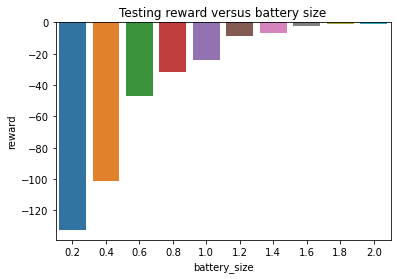

In [6]:
sns.barplot(data=rewards, x="battery_size", y="reward")
plt.title("Testing reward versus battery size")

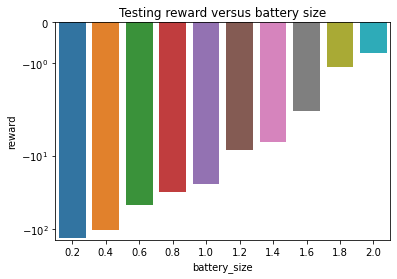

In [7]:
g = sns.barplot(data=rewards, x="battery_size", y="reward")
plt.title("Testing reward versus battery size")
g.set_yscale("symlog")

In [8]:
rewards.to_csv("/Users/alexanderkell/Documents/PhD/Projects/18-battery-optimisation/reports/figures/testing_rewards.csv")